# MOWNiT

## Laboratorium XYZ - Wielomiany ortogonalne 

Instalacja wymaganych pakietów

In [1]:
using Pkg

In [2]:
# Pkg.add("Polynomials")
# Pkg.add("SpecialPolynomials")
# Pkg.add("Plots")
# Pkg.add("CSV")
# Pkg.add("DataFrames")

In [3]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames

## Teoria

**Wielomiany ortogonalne** to rodzina wielomianów, w których iloczyn skalarny dwóch róznych wielomianów jest równa 0.

Jeżeli dodatkowo iloczyn skalarny wielomianu "przez siebie" jest równy 1, to nazywamy je **wielomianami ortonormalnymi**

Iloczyn skalarny wielomianów można zdefiniować jako:

$<P_m,P_n>=\int_a^b P_n(x)P_m(x)W(x)dx = 0$

Funkcja *W* jest nazywana *funkcją wagową*.

### Przykładowe rodziny wielomianów ortogonalnych

| Nazwa                | Przedział       | Funkcja wagowa           | Zastosowanie                                           | Parzystość                                                     |
|----------------------|-----------------|--------------------------|--------------------------------------------------------|----------------------------------------------------------------|
| Czebyszewa (1 rzędu) | [-1,1]          | $\frac{1}{\sqrt{1-x^2}}$ | Zera wielomianu jako węzły interpolacji wielomianowej  | Dla parzystego k - parzyste, dla nieparzystego k - nieparzyste |
| Legendre             | [-1,1]          | 1                        | Zera wielomianu jako węzły kwadratur Gaussa-Legendre'a | jw                                                             |
| Hermite              | [$-\infty$,$\infty$] | $\exp(-x^2)$             | Zera wielomianu jako węzły kwadratur Gaussa-Hermite'a  | jw                                                             |
| Laguerre             | [0,$\infty$]      | $\exp(-x)$               | Zera wielomianu jako węzły kwadratur Gaussa-Laguerra'a | brak                                                           |


### Wielomiany Hermite'a

Zdefiniowane są rekurencyjnie jako:

$H_0(x) = 1$

$H_1(x) = 2x$

$H_{n+1}(x) = 2xH_n(x)-2nH_{n-1}$

Wykres przykładowego wielomianu

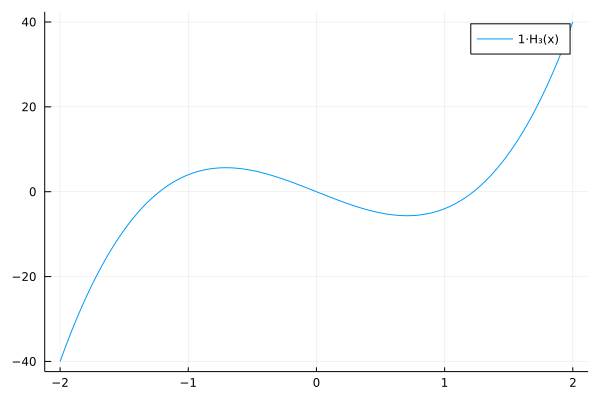

In [4]:
h3 = Hermite([0, 0, 0, 1])
plot(h3, -2, 2)

Żeby nie podawać wektora ze współczynnikami kolejnych stopni, można zrobić inaczej

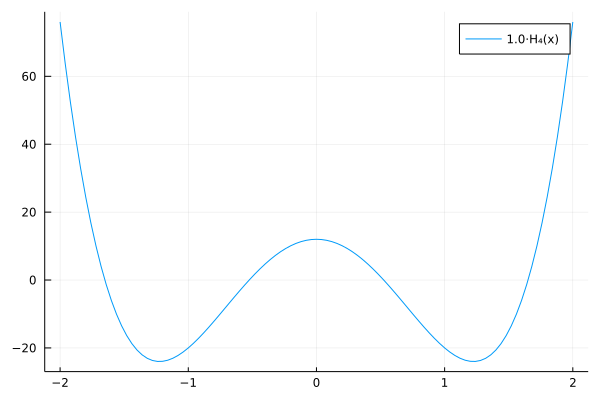

In [5]:
h4 = basis(Hermite, 4)
plot(h4, -2, 2)

### Przykład aproksymacji

Spróbujemy dokonać aproksymacji funkcji `cos` wykorzystując rodzinę wielomianów ortogonalnych Hermite'a.

In [6]:
# Definicja węzłów
xx = -5:.1:5
yy = cos.(xx/3 .+.2).^2 .+ rand(length(xx))/5;

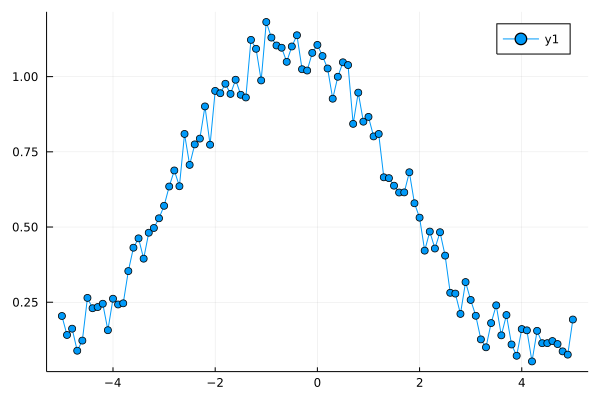

In [7]:
plot(xx, yy, markershape=:circle)

Funkcja aproksymuja jest iloczyn wielomianu i funkcji wagowej.

Obliczony wektor wartości normalizujemy do 1, żeby łatwiej policzyć współczynniki aproksymacji. 

**Pytanie** Dlaczego tutaj musi być `/2` w exp? W mgr też tak miałem w kodzie bo tak było w publikacjach, np.
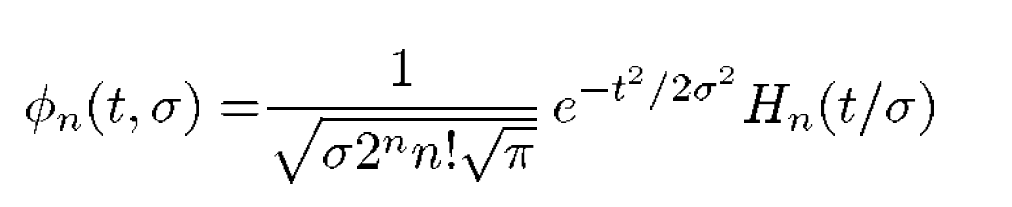

W lab zakładam, że sigma=1

In [8]:
# argument 'norm' tylko na potrzeby wykresów
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-x.^2/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [9]:
y_2_unnorm = base_fun(2, xx, false);
y_2_norm = base_fun(2, xx);

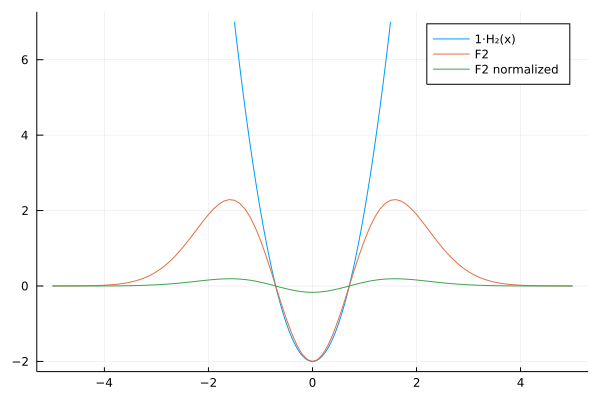

In [10]:
plot(Hermite([0, 0, 1]), -1.5, 1.5)
plot!(xx, y_2_unnorm, label="F2")
plot!(xx, y_2_norm, label="F2 normalized")

Obliczamy kilka kolejnych funkcji bazowych

In [11]:
f0 = base_fun(0, xx, true);
f1 = base_fun(1, xx, true);
f2 = base_fun(2, xx, true);
f3 = base_fun(3, xx, true);

Sprawdźmy czy baza jest ortonormalna

In [12]:
dot_base = Array{Float64, 2}(undef, 4, 4); 

for (i, f_i) in enumerate([f0, f1, f2, f3]) 
    for (j, f_j) in enumerate([f0, f1, f2, f3])
        dot_base[i,j] = dot(f_i, f_j)
    end
end

In [13]:
dot_base

4×4 Array{Float64,2}:
  1.0           7.4436e-18   -3.25356e-11   5.32557e-18
  7.4436e-18    1.0           1.88742e-17  -9.61163e-10
 -3.25356e-11   1.88742e-17   1.0          -7.22228e-18
  5.32557e-18  -9.61163e-10  -7.22228e-18   1.0

OK, baza jest ortonormalna

Obliczamy kolejne współczynniki aproksymacji. Dzięki ortonormalnej bazie, poszczególne współczynniki są iloczynami skalaranymi odpowiedniej funkcji bazowej oraz funkcji aproksymowanej.

In [14]:
c0 = dot(yy, f0)
c1 = dot(yy, f1)
c2 = dot(yy, f2)
c3 = dot(yy, f3)
c0, c1, c2, c3

(5.759915643866876, -0.8710617361781852, 2.6843168314810146, -0.7490110576657506)

Liczymy wartości aproksymowane kolejnymi stopniami

In [15]:
y_app_0 = c0*f0;
y_app_1 = c1*f1;
y_app_2 = c2*f2;
y_app_3 = c3*f3;

In [16]:
y_app_01 = y_app_0 + y_app_1;
y_app_012 = y_app_01 + y_app_2;
y_app_0123 = y_app_012 + y_app_3;

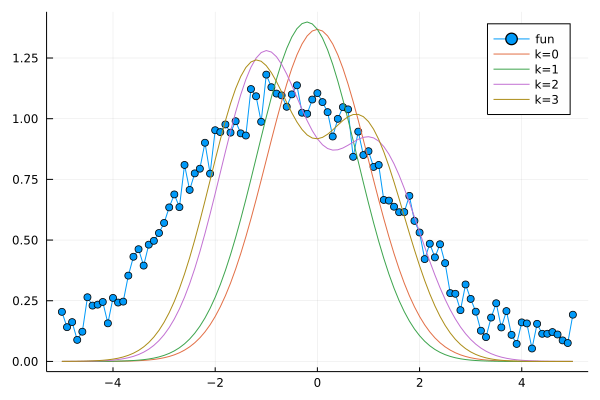

In [17]:
plot(xx, yy, markershape=:circle, label="fun")
plot!(xx, y_app_0, label="k=0")
plot!(xx, y_app_01, label="k=1")
plot!(xx, y_app_012, label="k=2")
plot!(xx, y_app_0123, label="k=3")

Liczymy błędy aproksymacji kolejnymi stopniami

In [18]:
using Statistics

In [19]:
mse(y1, y2) = mean((y1-y2).^2)

mse (generic function with 1 method)

In [20]:
mse(yy, y_app_0)

0.12582860261476908

In [21]:
mse(yy, y_app_01)

0.11831624075106853

In [22]:
mse(yy, y_app_012)

0.04697409369385698

In [23]:
mse(yy, y_app_0123)

0.04141946432989899

### EKG

Dane pochodzą z bazy https://www.physionet.org/content/mitdb/1.0.0/ .

W sygnale można wyróżnić wiele struktur, z których najbardziej charakterystyczną jest zespół QRS.

In [24]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);

In [25]:
first(ekg_data, 5)

,time,signalN,signalV
,Float64,Float64,Float64
1,-0.1,0.0183886,-0.0990972
2,-0.0972222,0.0145191,-0.0920442
3,-0.0944444,0.012849,-0.0831644
4,-0.0916667,0.0124946,-0.0722728
5,-0.0888889,0.0124117,-0.0593656


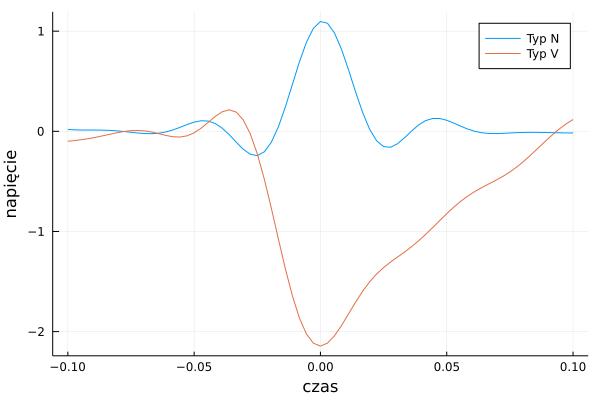

In [26]:
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

(5.725113911598116, -0.9157906158817669, 2.711325477169205, -0.8018390195854078)

In [27]:
# Definicja węzłów
xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV;

Uwaga: Funkcje bazowe mają pewną "szerokość" i najlepiej aproksymują inne funkcje o podobnej szerokości. Można dodatkowo sparametryzować f. bazowe aby były węższe i lepiej pasowały do zespołów QRS. Na potrzeby laboratorium postąpimy inaczej - przeskalujemy oś X aproksymowanych sygnałów.

## Zadania

#### Zadanie 1 (1 pkt)

Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

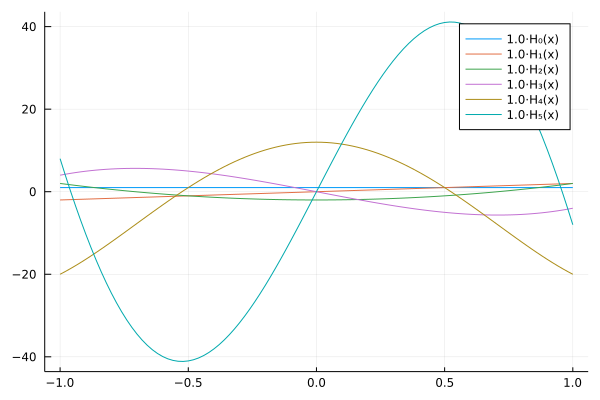

In [28]:
plot()
for i in 0:5
    hermite = basis(Hermite, i)
    plot!(hermite, -1, 1)
end
current()

#### Zadanie 2  (1 pkt)

Narysować 6 pierwszych funkcji aproksymujących

In [29]:
hermite_base(i, x) = basis(Hermite, i)(x)*exp(-x^2/2)

hermite_base (generic function with 1 method)

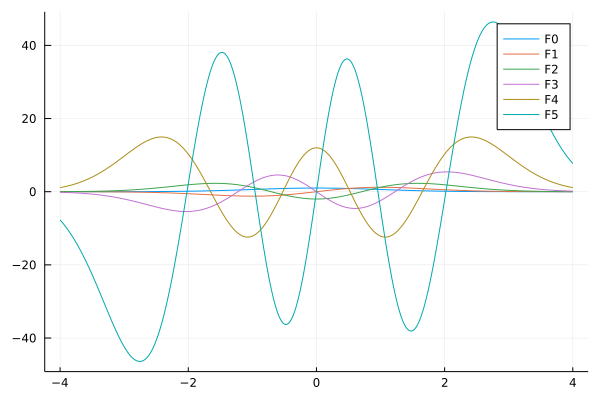

In [30]:
plot()
x = -4:.01:4
for i in 0:5
    hermite = hermite_base.(i, x)
    plot!(x, hermite, label="F$i")
end
current()

#### Zadanie 3  (1 pkt)

Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są.

In [31]:
ENV["COLUMNS"] = 240

240

In [32]:
n = 7 # number of functions to check

7

In [33]:
x = -6:.01:6 # define x for which functions will be evaulated

-6.0:0.01:6.0

##### Wielomiany Hermita

In [34]:
dot_hermite = Array{Float64, 2}(undef, n, n); 

In [35]:
for i = 0:n-1
    hermite_i = basis(Hermite, i).(x)
    for j = 0:n-1
        hermite_j = basis(Hermite, j).(x)
        d = dot(hermite_i, hermite_j)
        dot_hermite[i+1, j+1] = d
    end
end

In [36]:
dot_hermite

7×7 Array{Float64,2}:
  1201.0             -2.02505e-13  55342.1           3.63798e-12   4.31888e6    -4.07454e-10   3.75202e8
    -2.02505e-13  57744.1              1.04592e-11   4.65093e6    -3.49246e-10   4.18391e8     4.47035e-8
 55342.1              1.04592e-11      4.77123e6    -4.07454e-10   4.4696e8      2.23517e-8    4.24578e10
     3.63798e-12      4.65093e6       -4.07454e-10   4.56984e8     1.93715e-7    4.52539e10    4.76837e-6
     4.31888e6       -3.49246e-10      4.4696e8      1.93715e-7    4.6228e10     9.53674e-7    4.66194e12
    -4.07454e-10      4.18391e8        2.23517e-8    4.52539e10    9.53674e-7    4.76219e12   -0.000610352
     3.75202e8        4.47035e-8       4.24578e10    4.76837e-6    4.66194e12   -0.000610352   4.90259e14

Widać, że co drugi element jest ~0, a co drugi ma dużą wartość. - zapytać dlaczego.

##### Wielomiany Hermita z funkcją wagową

In [37]:
dot_hermite_basis = Array{Float64, 2}(undef, n, n);

In [38]:
for i = 0:n-1
    hermite_i = basis(Hermite, i).(x)
    for j = 0:n-1
        hermite_j = basis(Hermite, j).(x)
        hermite_j .*= exp.(-x.^2)
        d = dot(hermite_i, hermite_j)
        dot_hermite_basis[i+1, j+1] = d
    end
end

In [39]:
dot_hermite_basis

7×7 Array{Float64,2}:
 177.245          1.33997e-15    -5.15458e-13    -1.37368e-15     -7.24935e-11   2.96814e-14  -9.42961e-9
  -1.27377e-15  354.491           1.31868e-15    -7.56404e-11      7.75878e-17  -1.01545e-8    5.14588e-14
  -5.16167e-13    3.12729e-16  1417.96            5.0453e-14      -1.06147e-8   -1.54767e-14  -1.3819e-6
  -5.065e-15     -7.56281e-11     5.44665e-14  8507.78             1.56125e-14  -1.44742e-6    3.6782e-13
  -7.24837e-11   -1.43724e-14    -1.06146e-8     -3.75211e-14  68062.2          -4.5333e-12   -0.000191563
  -1.47086e-14   -1.01547e-8     -1.11624e-13    -1.44742e-6      -2.56615e-12   6.80622e5    -1.60997e-11
  -9.4296e-9      1.95508e-13    -1.38189e-6      5.24627e-13     -0.000191563  -1.47186e-11   8.16747e6

Wartoście niezerowe tylko na przekątnej.

#### Zadanie 4  (1 pkt)

Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

In [40]:
function hermite_app(x, y, n)
    coefs = zeros(n+1)
    y_app = zero(y)
    
    for k in 0:n
        f_k = base_fun(k, x);
        c_k = dot(y, f_k)

        y_k = c_k*f_k
        y_app .+= y_k
        
        coefs[k+1] = c_k
    end
    
    return (coefs, y_app)
end

hermite_app (generic function with 1 method)

In [41]:
xx = ekg_data.time*40
yyN = ekg_data.signalN;
yyV = ekg_data.signalV;

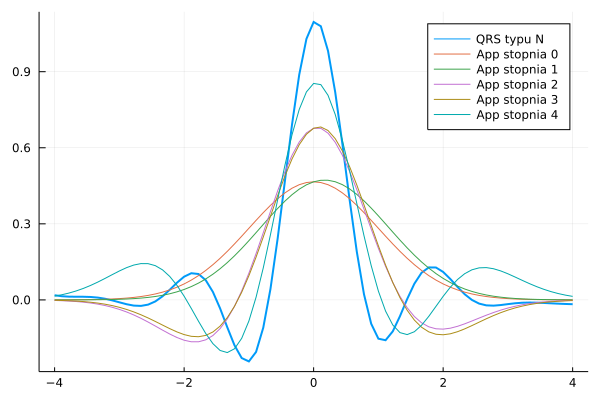

In [42]:
plot(xx, yyN, label="QRS typu N", linewidth=2)
for i in 0:4
    c, app = hermite_app(xx, yyN, i);
    plot!(xx, app, label="App stopnia $i")
end
current()

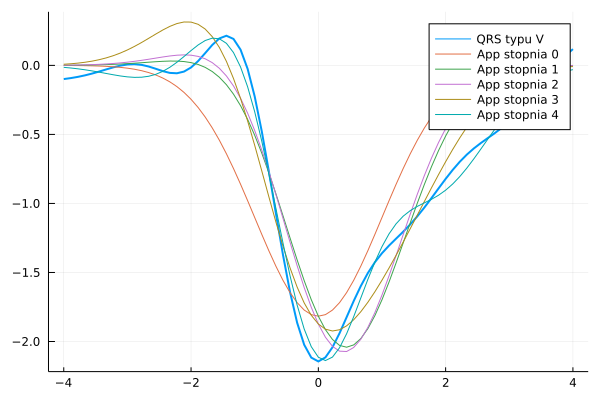

In [43]:
plot(xx, yyV, label="QRS typu V", linewidth=2)
for i in 0:4
    c, app = hermite_app(xx, yyV, i);
    plot!(xx, app, label="App stopnia $i")
end
current()

#### Zadanie 5  (1 pkt)

Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

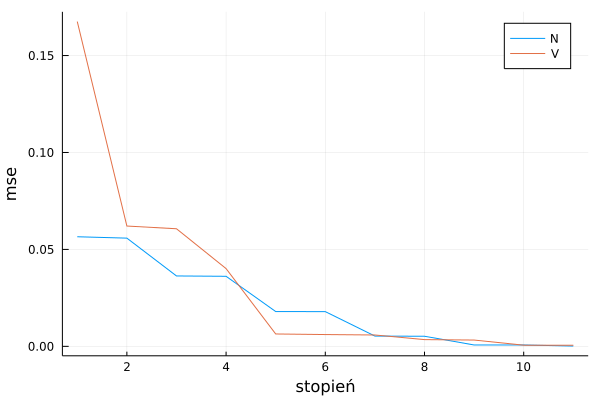

In [44]:
n = 10
errN = zeros(n+1);
errV = zeros(n+1);

for i in 0:n
    cN, ap_N = hermite_app(xx, yyN, i);
    errN[i+1] = mse(yyN, ap_N)
    
    cV, ap_V = hermite_app(xx, yyV, i);
    errV[i+1] = mse(yyV, ap_V)
end

plot(errN, xlabel="stopień", ylabel="mse", label="N")
plot!(errV, xlabel="stopień", ylabel="mse", label="V")

# 